In [34]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_results(results_dir):
    result_dfs = []
    for p in results_dir.glob("*"):
        key = '_'.join(p.name.split("_")[2:])
        df = pd.read_pickle(p / "history.pkl")
        ds_name, privacy_level = key.split("_")[:2]
        is_iid = key.endswith("_iid")
        df["dataset"] = [ds_name] * len(df)
        df["privacy_level"] = [privacy_level] * len(df)
        df["is_iid"] = [is_iid] * len(df)
        result_dfs.append(df)
    df = pd.concat(result_dfs)
    return df

In [21]:
def get_df_for_run(df, dataset, privacy_level, iid):
    return df[
        (df["dataset"] == dataset)
        & (df["privacy_level"] == privacy_level)
        & (df["is_iid"] == iid)
    ]

In [8]:
results_dir = Path("/home/ole/masterarbeit/flidp/results/2024-09-06_16:16:26-all")
df = get_results(results_dir)

/tmp/ipykernel_1781904/2320095545.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(result_dfs)


In [9]:
len(df)

2525

In [70]:
def plot_by_privacy(df, dataset, iid):
    pivoted = (
        df[
            (df["dataset"] == dataset) 
            & (df["is_iid"] == iid)
        ][["accuracy", "privacy_level", "round"]]
        .dropna()
        .pivot(index="round", columns="privacy_level", values="accuracy")
    )
    pivoted.plot()

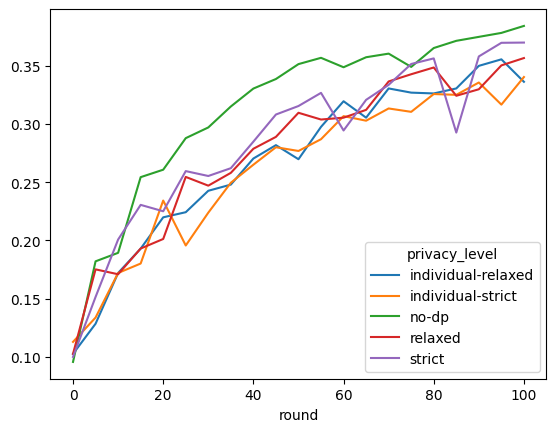

In [80]:
plot_by_privacy(df, "cifar10", True)